Objective: Improve customer experience by analysing "Diwali Sales Data" & increase revenue

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("C:/Users/Anusua Pani/OneDrive/Documents/Diwali Sales Data.csv",encoding="unicode_escape")

In [5]:
df.shape

(11251, 14)

In [6]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,Unnamed
0,1002903,Sanskriti,P00125942,F,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age               11251 non-null  int64  
 5   Marital_Status    11251 non-null  int64  
 6   State             11251 non-null  object 
 7   Zone              11251 non-null  object 
 8   Occupation        11251 non-null  object 
 9   Product_Category  11251 non-null  object 
 10  Orders            11251 non-null  int64  
 11  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(7)
memory usage: 1.0+ MB


In [8]:
df.drop(["Status","Unnamed"],axis=1,inplace=True)

In [14]:
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [13]:
#replace null values with mean
df["Amount"]=df.groupby("Product_Category")["Amount"].transform(lambda x:x.fillna(x.mean()))

In [15]:
df["Amount"].dtype

dtype('float64')

In [16]:
#converting float64 to int32 for simplicity of calculation
df["Amount"]=df["Amount"].astype("int")

In [17]:
df["Amount"].dtype

dtype('int32')

In [18]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age', 'Marital_Status',
       'State', 'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount'],
      dtype='object')

In [80]:
df.rename(columns= {"Marital_Status":"Married"},inplace=True)

In [81]:
df.describe()

,User_ID,Age,Married,Orders,Amount
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11251.000000
mean,1.003004e+06,35.421207,0.420318,2.489290,9460.454626
std,1.716125e+03,12.754122,0.493632,1.115047,5224.434220
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.500000
50%,1.003065e+06,33.000000,0.000000,2.000000,8110.000000
75%,1.004430e+06,43.000000,1.000000,3.000000,12691.500000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [23]:
def categorise(age):
    if age<=20:
        return '0-20'
    elif age<=40:
        return '21-40'
    elif age<=60:
        return '41-60'
    elif age<=80:
        return '61-80'
    else:
        return '80+'

df["Age_group"]=df["Age"].apply(categorise)

In [82]:
df

,User_ID,Cust_name,Product_ID,Gender,Age,Married,State,Zone,Occupation,Product_Category,Orders,Amount,Age_group
0,1002903,Sanskriti,P00125942,F,28,0,Maharashtra,Western,Healthcare,Auto,1,23952,21-40
1,1000732,Kartik,P00110942,F,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934,21-40
2,1001990,Bindu,P00118542,F,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924,21-40
3,1001425,Sudevi,P00237842,M,16,0,Karnataka,Southern,Construction,Auto,2,23912,0-20
4,1000588,Joni,P00057942,M,28,1,Gujarat,Western,Food Processing,Auto,2,23877,21-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,19,1,Maharashtra,Western,Chemical,Office,4,370,0-20
11247,1004089,Reichenbach,P00171342,M,33,0,Haryana,Northern,Healthcare,Veterinary,3,367,21-40
11248,1001209,Oshin,P00201342,F,40,0,Madhya Pradesh,Central,Textile,Office,4,213,21-40
11249,1004023,Noonan,P00059442,M,37,0,Karnataka,Southern,Agriculture,Office,3,206,21-40


Exploratory Data Analysis

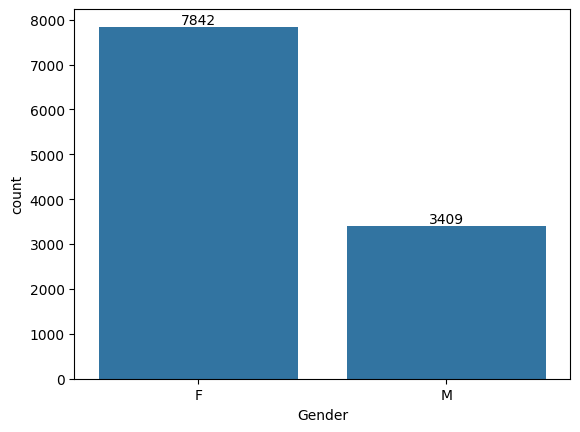

In [36]:
#Gender
ax=sns.countplot(x="Gender",data=df)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

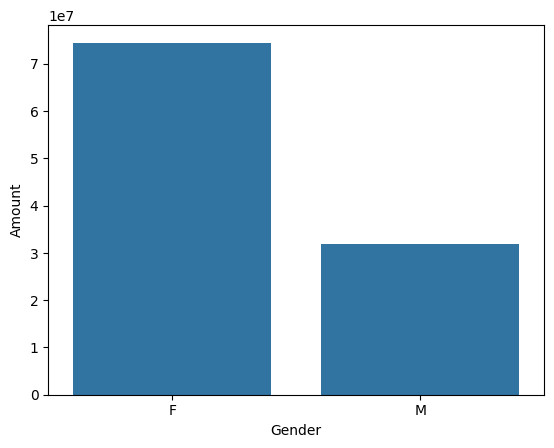

In [46]:
Sales_Gender=df.groupby(["Gender"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
sns.barplot(x="Gender",y="Amount",data=Sales_Gender)

From the above two graphs we can conclude that most of the buyers are female and amount wise also female contribute more than male.

Age wise analysis:

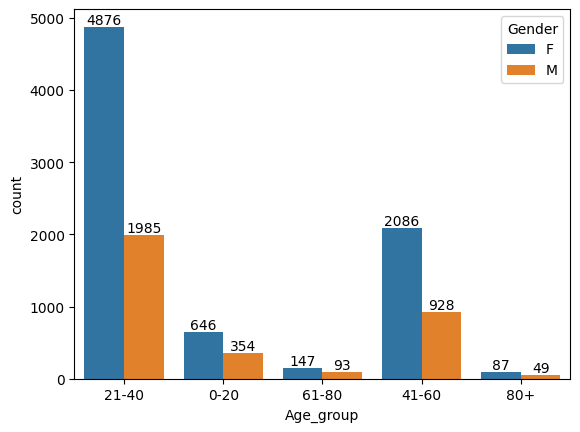

In [51]:
ax=sns.countplot(x="Age_group",data=df,hue="Gender")
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age_group', ylabel='Amount'>

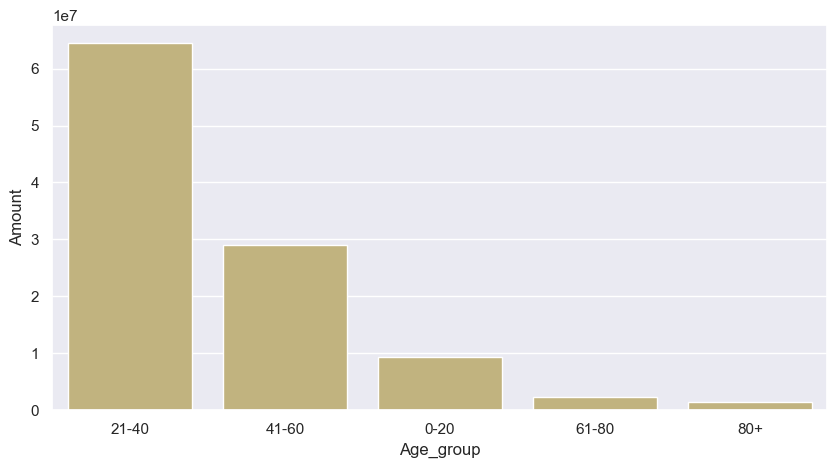

In [78]:
Sales_Age=df.groupby(["Age_group"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
sns.barplot(x="Age_group",y="Amount",data=Sales_Age,color='y')

The above analysis concludes that females in the age_group 21-40 are the prominant buyers.

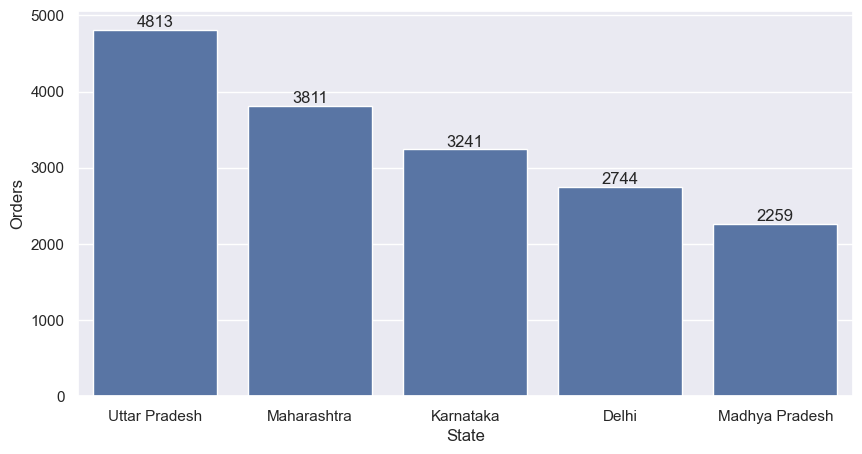

In [120]:
Sales_State=df.groupby(["State"],as_index=False)["Orders"].sum().sort_values(by="Orders",ascending=False).head()
ax=sns.barplot(x="State",y="Orders",data=Sales_State)
sns.set(rc={"figure.figsize":(10,5)})
for bars in ax.containers:
    ax.bar_label(bars)


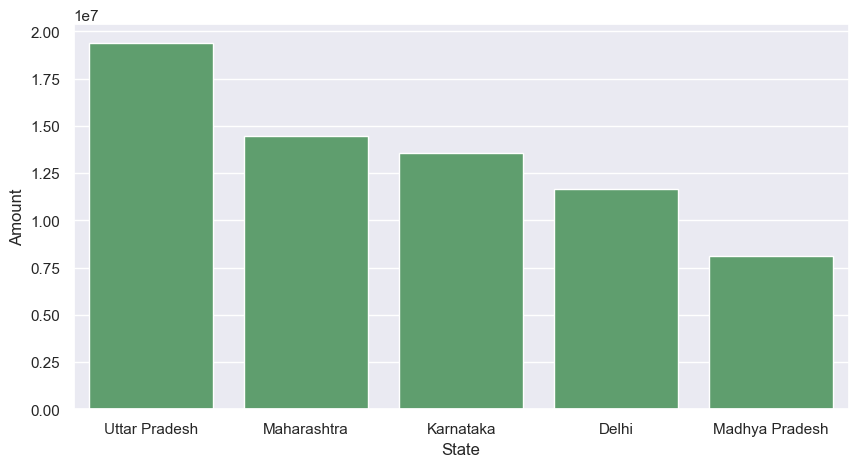

In [77]:
#Total amount vs States
Sales_State=df.groupby(["State"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False).head()
ax=sns.barplot(x="State",y="Amount",data=Sales_State,color='g')
sns.set(rc={"figure.figsize":(10,5)})

Most of the orders & total sales amount are from Uttarpradesh,Maharastra,Karnataka,Delhi,Madhya Pradesh

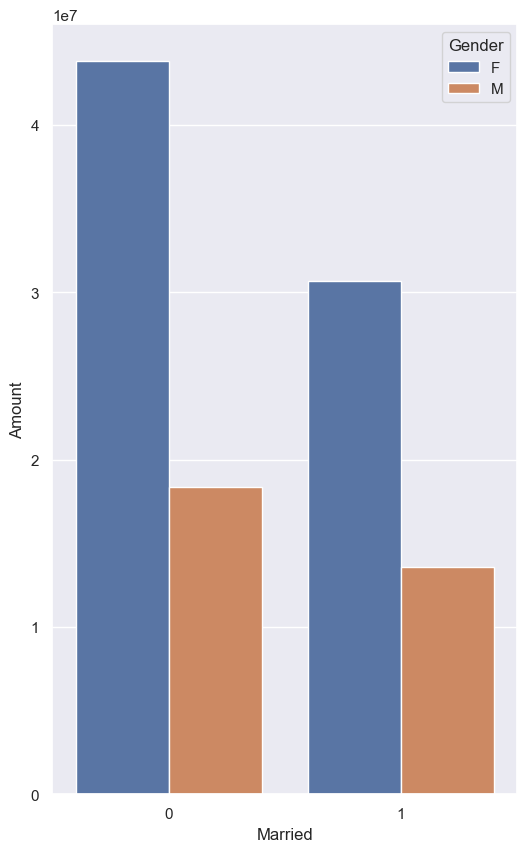

In [90]:
Sales_data=df.groupby(["Married","Gender"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
ax=sns.barplot(x="Married",y="Amount",data=Sales_data,hue="Gender")
sns.set(rc={"figure.figsize":(6,10)})

Most of the buyers are unmarried female

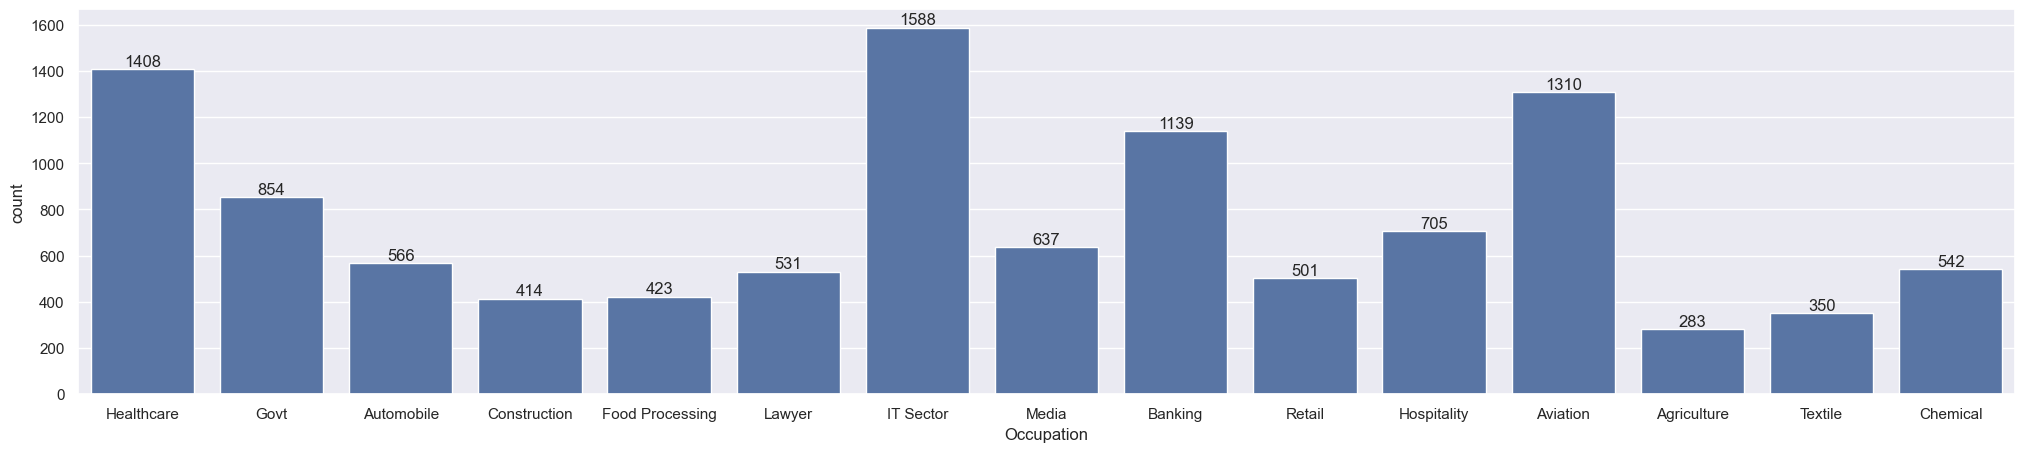

In [105]:
ax=sns.countplot(x="Occupation",data=df)
sns.set(rc={"figure.figsize":(27,5)})
for bars in ax.containers:
    ax.bar_label(bars)

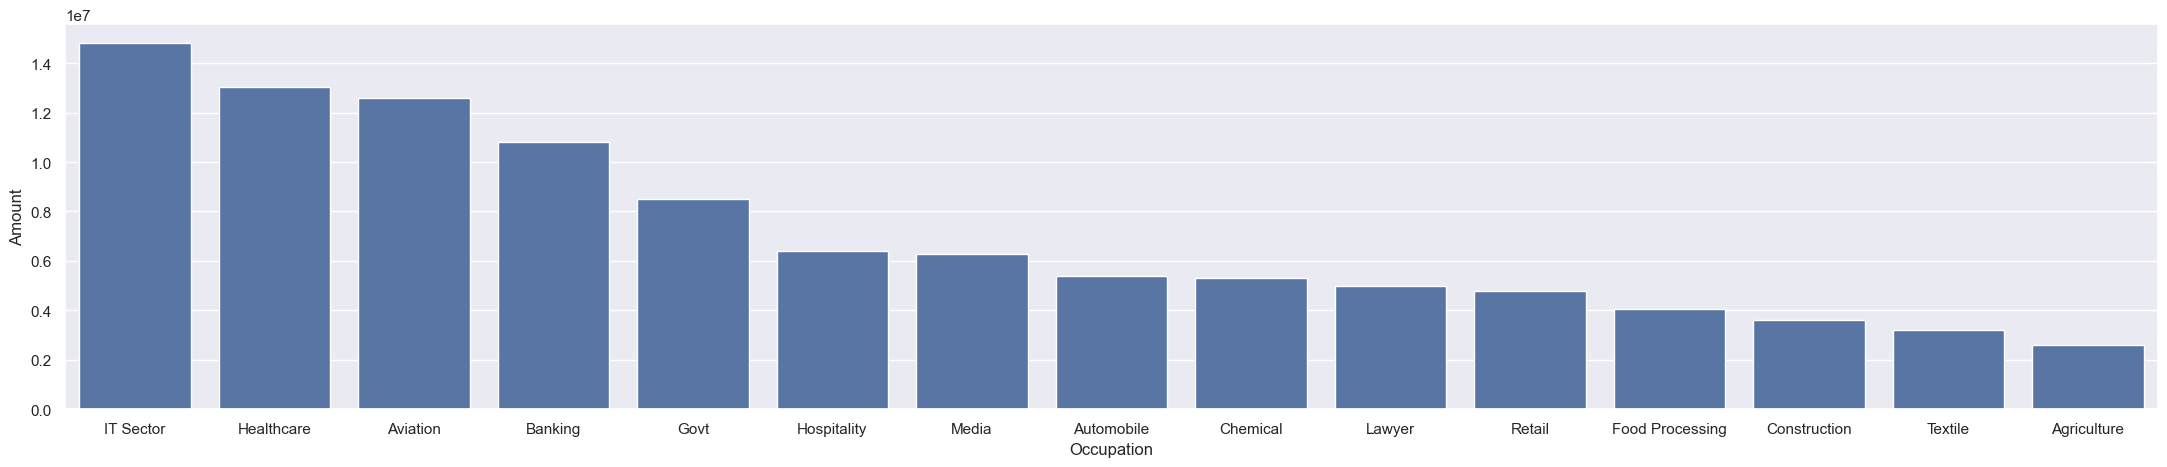

In [106]:
Sales_occ=df.groupby(["Occupation"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
ax=sns.barplot(x="Occupation",y="Amount",data=Sales_occ)
sns.set(rc={"figure.figsize":(10,5)})

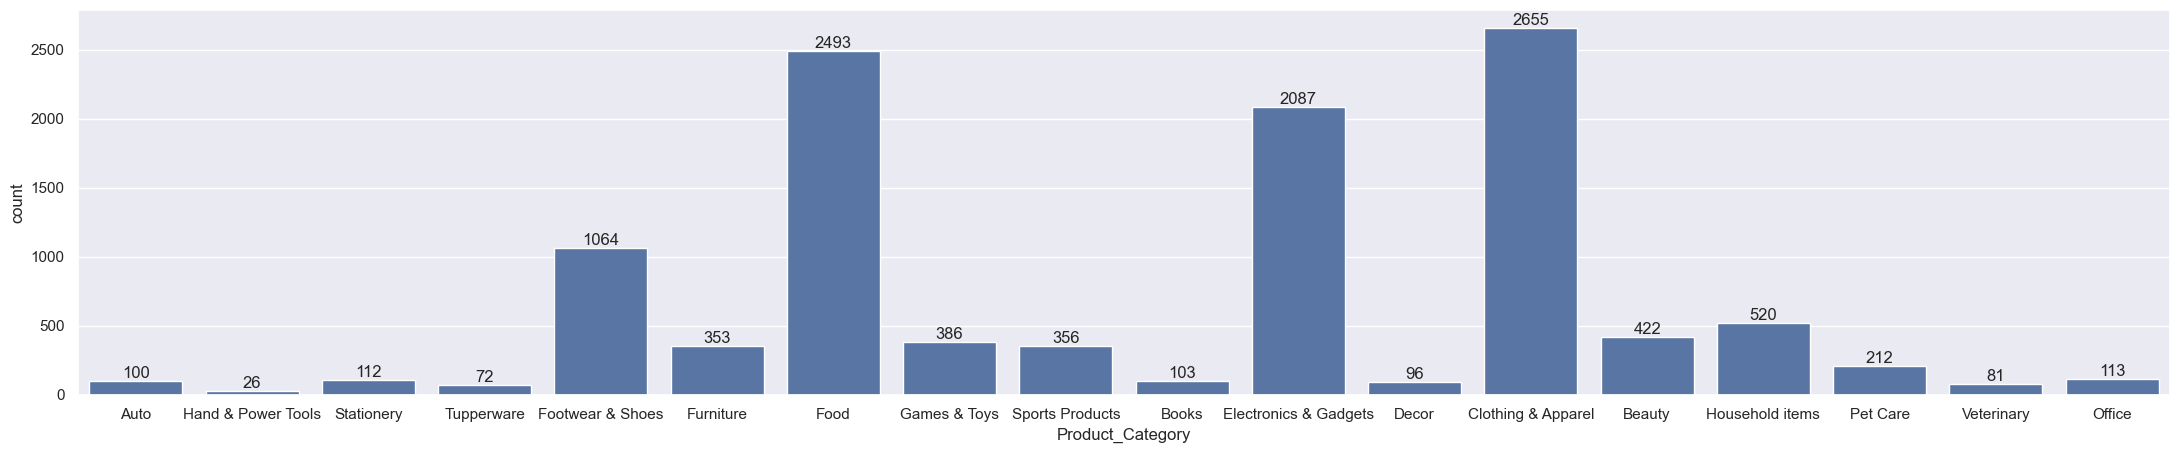

In [124]:
ax=sns.countplot(x="Product_Category",data=df)
sns.set(rc={"figure.figsize":(27,5)})
for bars in ax.containers:
    ax.bar_label(bars)

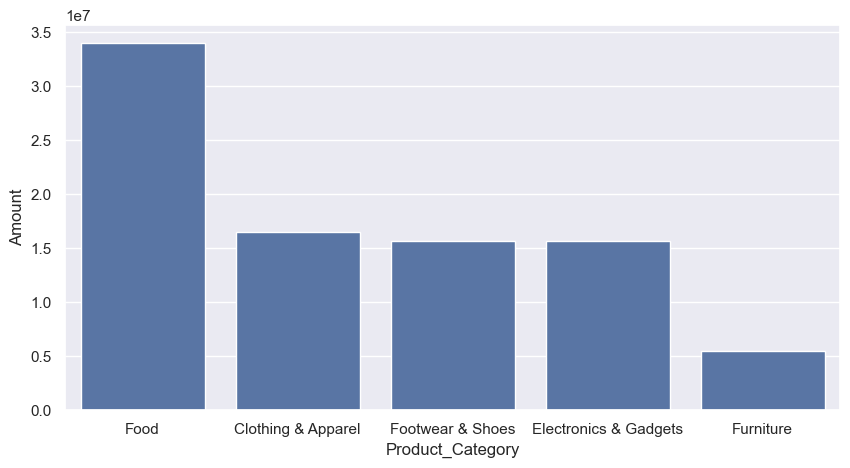

In [121]:
Sales_prod=df.groupby(["Product_Category"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False).head()
ax=sns.barplot(x="Product_Category",y="Amount",data=Sales_prod)
sns.set(rc={"figure.figsize":(10,5)})